Training dataset:
Train_data: (512, 30)
Train_target: (512,)
Testing dataset:
Test_data: (57, 30)
Test_target: (57,)
Model LogisticRegression basic:
Model accuracy is 0.96
[[17  2]
 [ 0 38]]


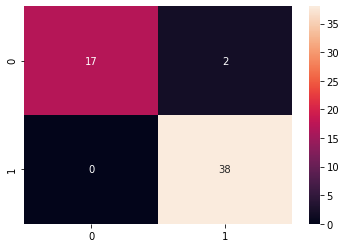


Model predicted for client 0 value [1]
Real value for client "0" is 1
[[0.04698588 0.95301412]]

Model predicted for client 1 value [1]
Real value for client "1" is 1
[[1.71950948e-04 9.99828049e-01]]

Model predicted for client 2 value [1]
Real value for client "2" is 1
[[0.14160274 0.85839726]]

Model predicted for client 3 value [1]
Real value for client "3" is 1
[[0.02660868 0.97339132]]

Model predicted for client 4 value [1]
Real value for client "4" is 1
[[6.22653429e-06 9.99993773e-01]]

Model predicted for client 5 value [0]
Real value for client "5" is 0
[[9.99934806e-01 6.51944035e-05]]

Model predicted for client 6 value [1]
Real value for client "6" is 1
[[0.00105606 0.99894394]]

Model predicted for client 7 value [1]
Real value for client "7" is 1
[[0.01167722 0.98832278]]

Model predicted for client 8 value [1]
Real value for client "8" is 1
[[5.96688417e-05 9.99940331e-01]]

Model predicted for client 9 value [1]
Real value for client "9" is 1
[[0.00223226 0.99776774]

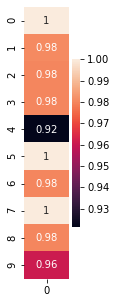

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

#Cross walidacja dla naszych danych
def cross_valid_data(iteration):
    print("\nCross walidacja:")
    scores = cross_val_score(LogisticRegression(), cancer_train_data, cancer_train_target, cv=iteration)
    plt.figure(figsize=(1, 5))
    sns.heatmap(scores[:, np.newaxis],annot=True)
    plt.show()

#Przetestowanie naszego modelu dla określonych przez nas elementów - porównanie wyniku modelu z rzeczywistym wynikiem
def compare_model_resault_to_real_value(first_item, last_item):
    for i in range(first_item, last_item):
    
        prediction = logistic_regression.predict(cancer_test_data[i,:].reshape(1,-1))
        print("\nModel predicted for client {0} value {1}".format(i, prediction))
        print("Real value for client \"{0}\" is {1}".format(i, cancer_test_target[i]))
        #Wyświetlenie 
        print(logistic_regression.predict_proba(cancer_test_data[i,:].reshape(1,-1)))
    

#Załadowanie danych
data_cancer = load_breast_cancer()

#Skalowanie daty
scaler = StandardScaler()
scaled_data_cancer = scaler.fit_transform(data_cancer['data'])

#Rozdzielenie danych na zbiór trenujący i testujący (90% do 10%)
cancer_train_data, cancer_test_data, \
cancer_train_target, cancer_test_target = \
train_test_split(scaled_data_cancer, data_cancer.target, test_size=0.1)

#Informacje o rozmiarze podzielonych danych
print("Training dataset:")
print("Train_data:", cancer_train_data.shape)
print("Train_target:", cancer_train_target.shape)

print("Testing dataset:")
print("Test_data:", cancer_test_data.shape)
print("Test_target:", cancer_test_target.shape)

#Trenowanie modelu z pomocą regresji logistycznej
logistic_regression = LogisticRegression()
logistic_regression.fit(cancer_train_data, cancer_train_target)

#Skutecznośc naszego modelu
print("Model LogisticRegression basic:")
acc = accuracy_score(cancer_test_target, logistic_regression.predict(cancer_test_data))
print("Model accuracy is {0:0.2f}".format(acc))
conf_matrix = confusion_matrix(cancer_test_target, logistic_regression.predict(cancer_test_data))
print(conf_matrix)

sns.heatmap(conf_matrix,annot=True)
plt.show()

compare_model_resault_to_real_value(0,10)
cross_valid_data(10)

In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_cancer = load_breast_cancer()
pd_data = pd.DataFrame(data_cancer['data'], columns= data_cancer.feature_names)

fig = plt.figure()

for i,b in enumerate(list(bcdf.columns[0:30])): 
    i +=1
    ax = fig.add_subplot(5,6,i)
    ax.hist(pd_data[b], label = 'Value', stacked = True, color= 'b')
    ax.set_title(b)

plt.tight_layout()
plt.show()   


NameError: name 'bcdf' is not defined

<Figure size 432x288 with 0 Axes>

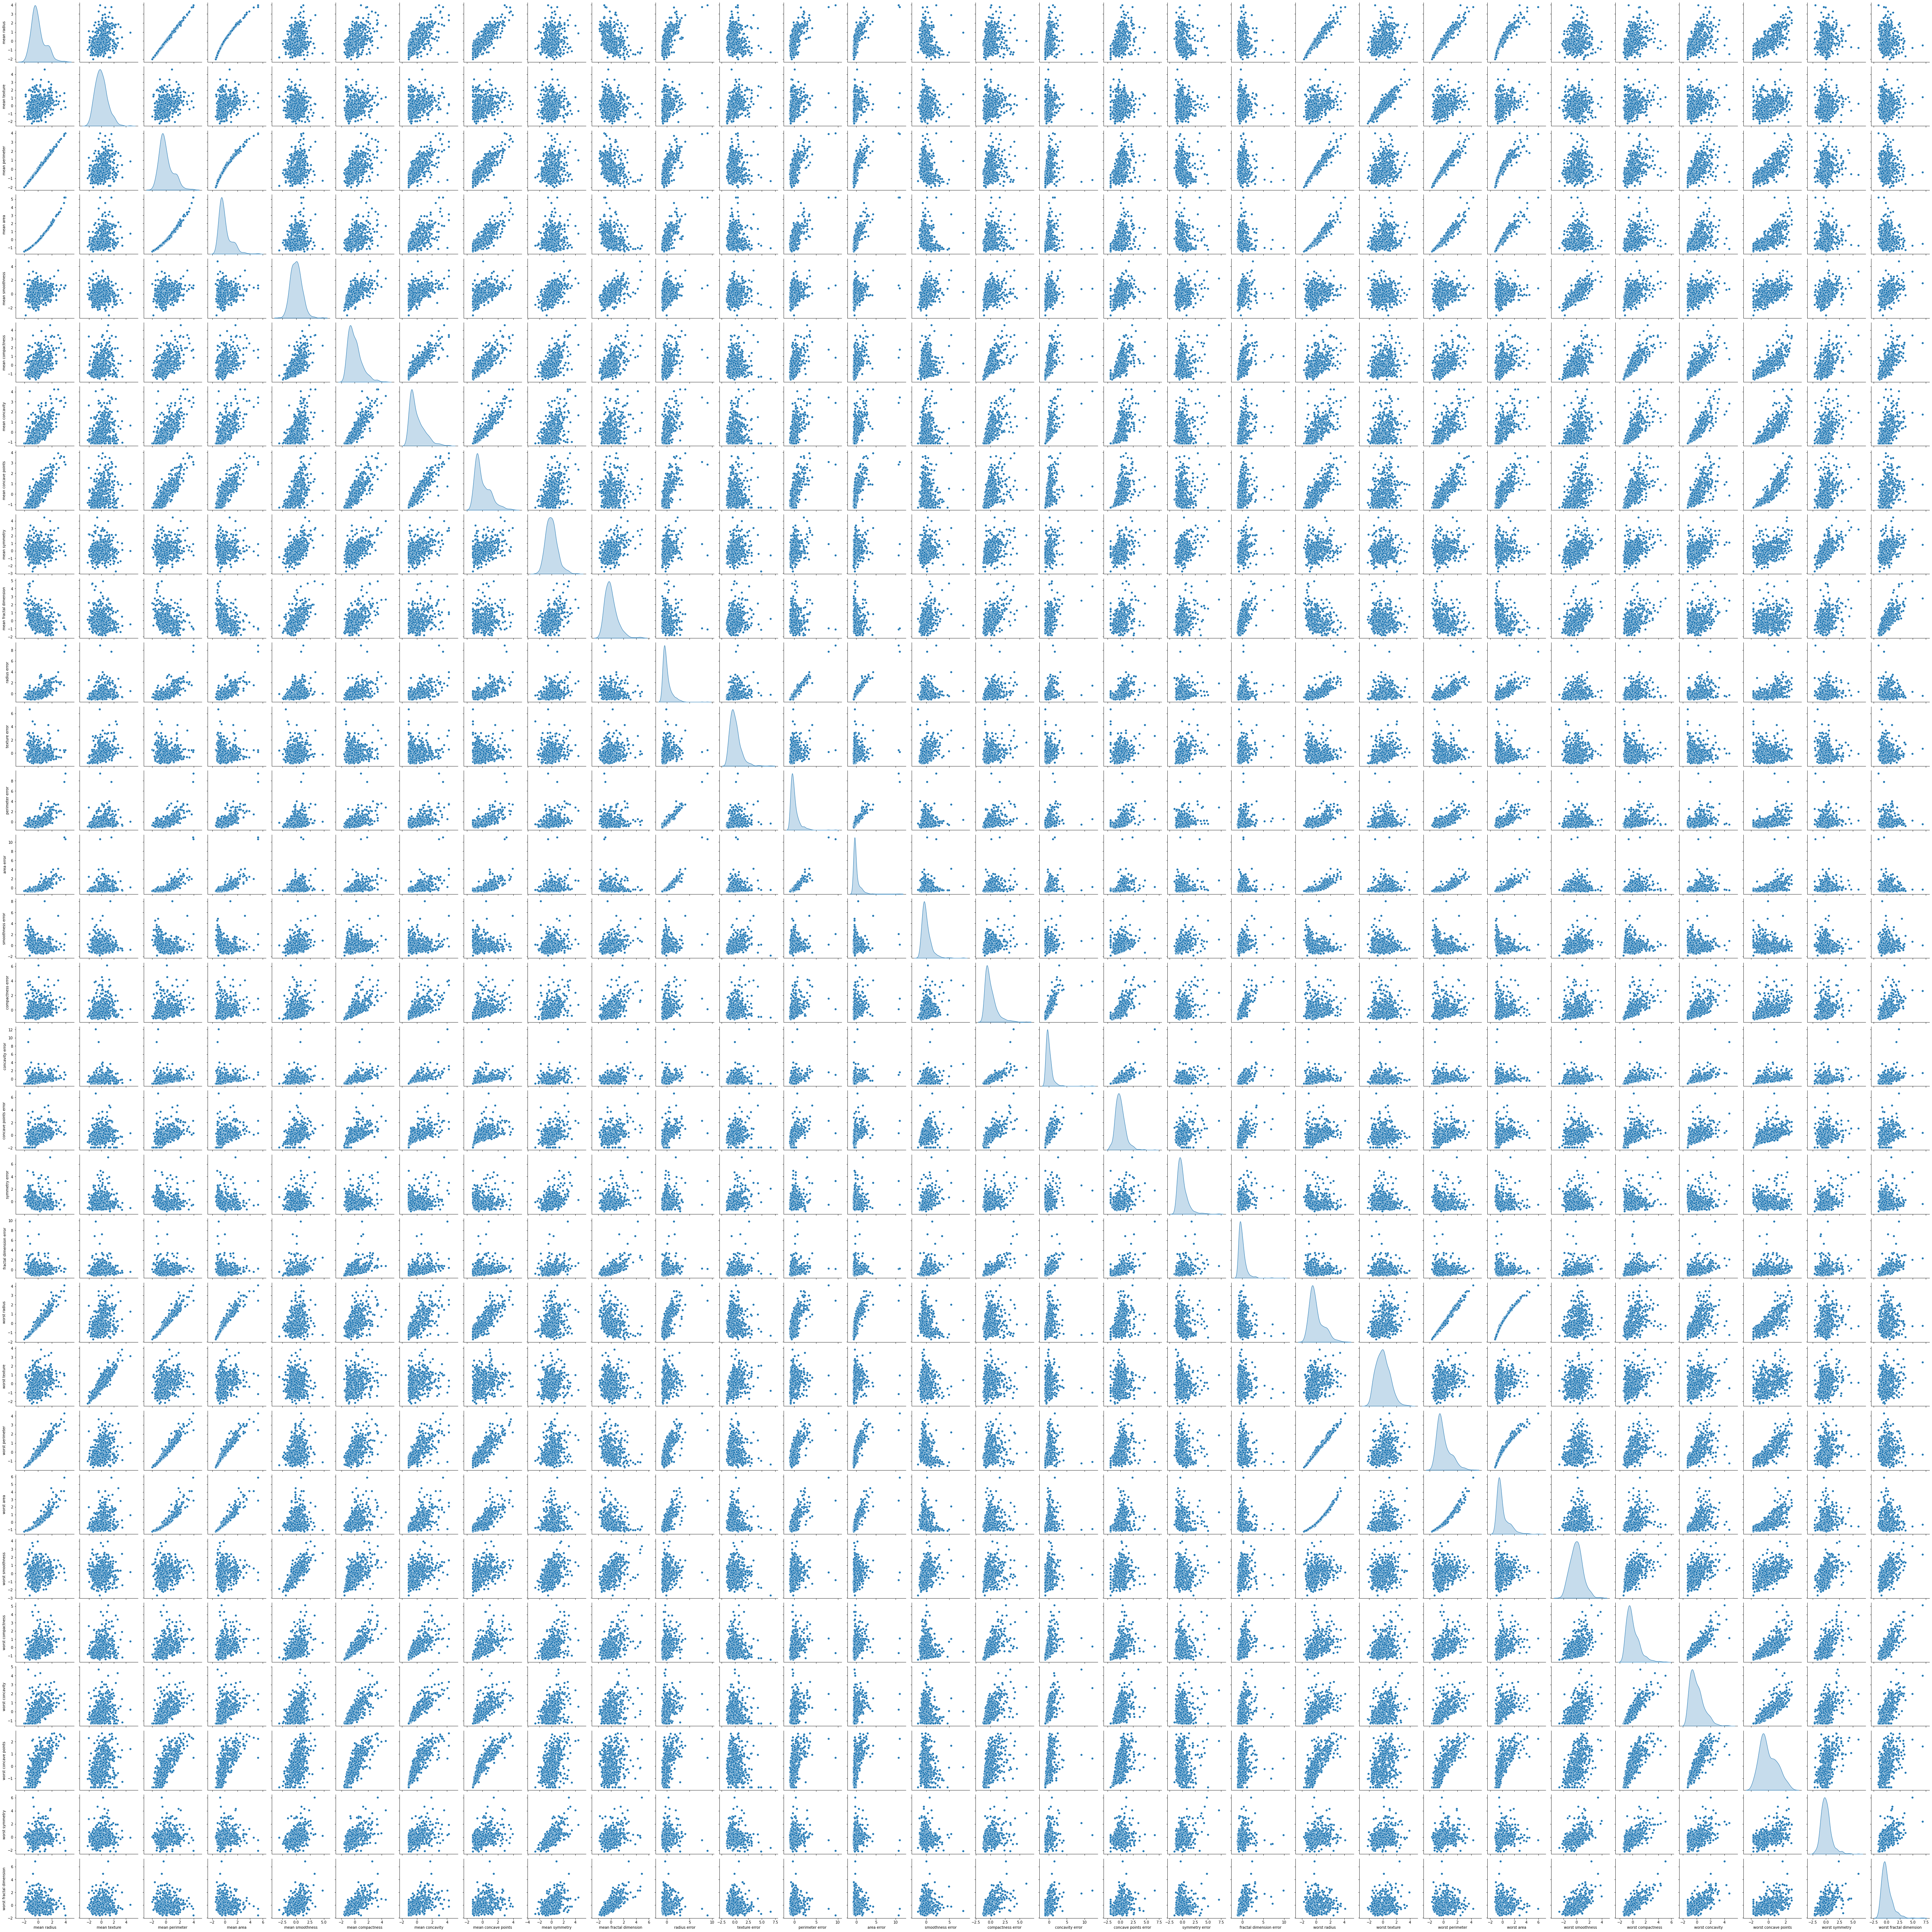

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(pd_data, diag_kind="kde")


Model LogisticRegression with PF and RFE:


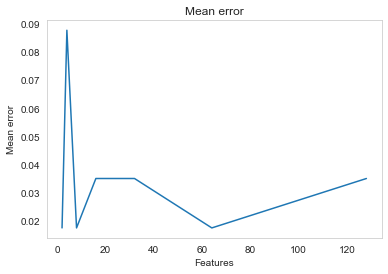

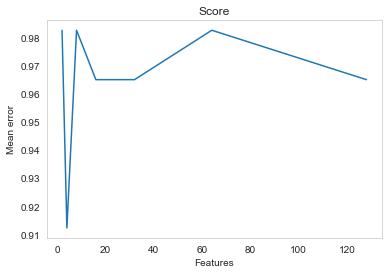

In [211]:
# POLY FEATURES AND RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

x = []
y_mean = []
y_score = []

def PolynomialFeatures_for_LogisticRegression(degree):
    print("\nModel LogisticRegression with PF and RFE:")

    pt = PolynomialFeatures(degree, )

    cancer_train_poly = pt.fit_transform(cancer_train_data)
    cancer_test_poly = pt.fit_transform(cancer_test_data)


    #logistic_regression_poly = LogisticRegression(solver='lbfgs', max_iter=300)
    #logistic_regression_poly.fit(credit_clients_train_poly, cancer_train_target)
    
    i=2
    
    while i <= 128:
        sel_ = RFE(estimator=LogisticRegression(solver='lbfgs', max_iter=300), n_features_to_select=i)
        sel_.fit(cancer_train_poly, cancer_train_target)
        x.append(i);
        y_mean.append(mean_squared_error(cancer_test_target, sel_.predict(cancer_test_poly)))
        y_score.append(sel_.score(cancer_test_poly, cancer_test_target))
        i*=2

    #acc = accuracy_score(cancer_test_target, sel_.predict(credit_clients_test_poly))
    #print("Model accuracy is {0:0.2f}".format(acc))
    
    #conf_matrix = confusion_matrix(cancer_test_target, sel_.predict(credit_clients_test_poly))
    #print(conf_matrix)
    
PolynomialFeatures_for_LogisticRegression(2)

plt.plot(x,y_mean)
plt.title("Mean error")
plt.grid()
plt.xlabel("Features")
plt.ylabel("Mean error")
plt.show()

plt.plot(x,y_score)
plt.title("Score")
plt.grid()
plt.xlabel("Features")
plt.ylabel("Mean error")
plt.show()


Solver:newton-cg


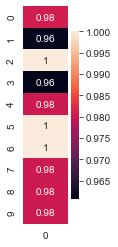

Solver:lbfgs


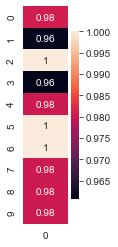

Solver:liblinear


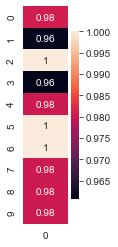

C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergence

Solver:sag


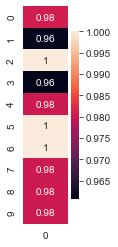

C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_sag.py:330: Convergence

Solver:saga


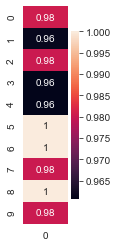

In [146]:
%matplotlib inline

tab = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


for sol in tab:
    scores = cross_val_score(LogisticRegression(solver=sol), cancer_train_data, cancer_train_target, cv=10)
    plt.figure(figsize=(1,4))
    sns.heatmap(scores[:, np.newaxis],annot=True)
    print("Solver:" + sol)
    plt.show()
    


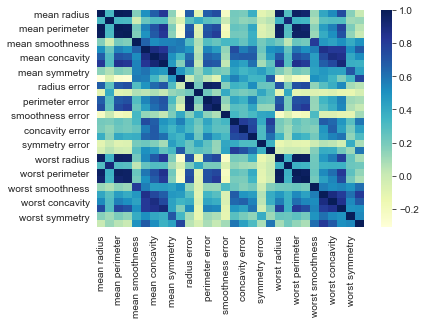

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd_data = pd.DataFrame(data_cancer['data'], columns= data_cancer.feature_names)

sns.heatmap(pd_data.corr(),cmap="YlGnBu")
plt.show()

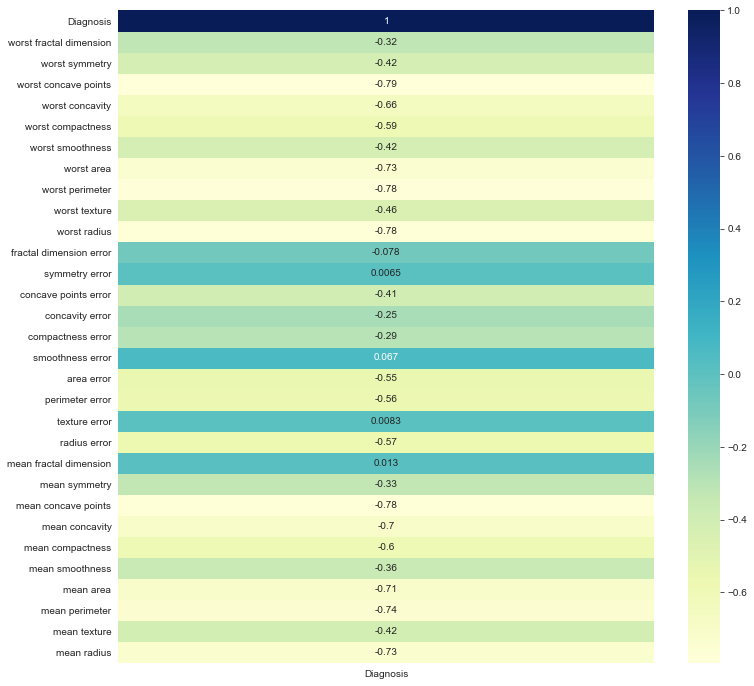

In [193]:
pd_data['Diagnosis'] = data_cancer.target
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(pd_data.corr()[['Diagnosis']], cmap='YlGnBu', annot=True);
ax.invert_yaxis()

Model LogisticRegression basic - Test data = 10 %
Model accuracy is 0.96
[[19  1]
 [ 1 36]]


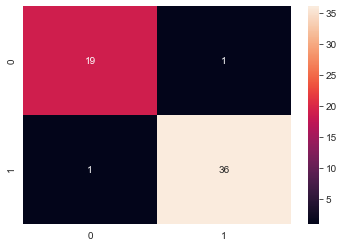

Model LogisticRegression basic - Test data = 20 %
Model accuracy is 0.97
[[39  3]
 [ 0 72]]


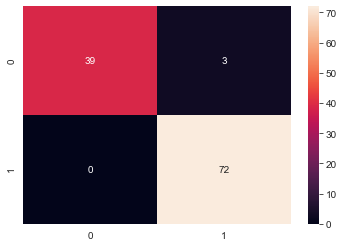

Model LogisticRegression basic - Test data = 30 %
Model accuracy is 0.98
[[ 57   2]
 [  2 110]]


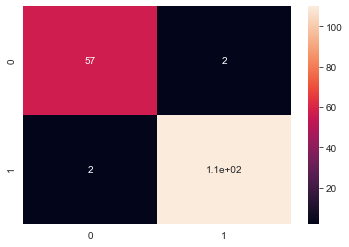

Model LogisticRegression basic - Test data = 40 %
Model accuracy is 0.98
[[ 86   3]
 [  1 138]]


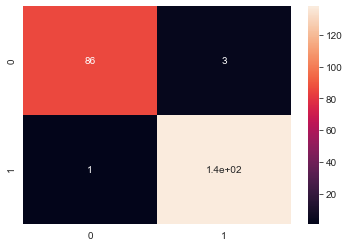

Model LogisticRegression basic - Test data = 50 %
Model accuracy is 0.98
[[104   7]
 [  0 174]]


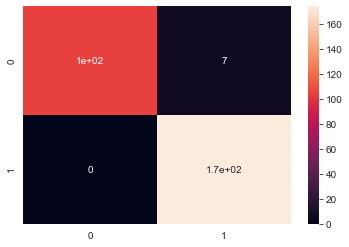

In [183]:
for size in range (1,6):
    cancer_train_data, cancer_test_data, \
    cancer_train_target, cancer_test_target = \
    train_test_split(scaled_data_cancer, data_cancer.target, test_size=(size/10))
    #Trenowanie modelu z pomocą regresji logistycznej
    logistic_regression = LogisticRegression()
    logistic_regression.fit(cancer_train_data, cancer_train_target)

    #Skutecznośc naszego modelu
    print("Model LogisticRegression basic - Test data = {} %".format(size*10))
    acc = accuracy_score(cancer_test_target, logistic_regression.predict(cancer_test_data))
    print("Model accuracy is {0:0.2f}".format(acc))
    conf_matrix = confusion_matrix(cancer_test_target, logistic_regression.predict(cancer_test_data))
    print(conf_matrix)

    sns.heatmap(conf_matrix,annot=True)
    plt.show()


C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\domin\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

Text(0, 0.5, 'Accuracy score')

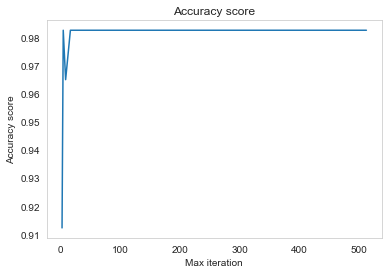

In [210]:
i = 2
x = []
y_acc = []

while i <= 512:
    x.append(i)
    logistic_regression = LogisticRegression(max_iter=i)
    logistic_regression.fit(cancer_train_data, cancer_train_target)
    acc = accuracy_score(cancer_test_target, logistic_regression.predict(cancer_test_data))
    y_acc.append(acc)
    i *= 2

plt.plot(x, y_acc)
plt.title("Accuracy score")
plt.grid()
plt.xlabel("Max iteration")
plt.ylabel("Accuracy score")

In [ ]:
# POLY FEATURES AND RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

x = []
y_mean = []
y_score = []

def PolynomialFeatures_for_LogisticRegression(degree):
    print("\nModel LogisticRegression with PF and RFE:")

    pt = PolynomialFeatures(degree, )

    cancer_train_poly = pt.fit_transform(cancer_train_data)
    cancer_test_poly = pt.fit_transform(cancer_test_data)


    #logistic_regression_poly = LogisticRegression(solver='lbfgs', max_iter=300)
    #logistic_regression_poly.fit(credit_clients_train_poly, cancer_train_target)
    
    sel_ = RFE(estimator=LogisticRegression(solver='lbfgs', max_iter=300), n_features_to_select=50)
    sel_.fit(cancer_train_poly, cancer_train_target)
    x.append(i);
    y_mean.append(mean_squared_error(cancer_test_target, sel_.predict(cancer_test_poly)))
    y_score.append(sel_.score(cancer_test_poly, cancer_test_target))
    
for i in range(1,9):
    PolynomialFeatures_for_LogisticRegression(i)

plt.plot(x,y_mean)
plt.title("Mean error")
plt.grid()
plt.xlabel("Features")
plt.ylabel("Mean error")
plt.show()

plt.plot(x,y_score)
plt.title("Score")
plt.grid()
plt.xlabel("Features")
plt.ylabel("Mean error")
plt.show()